In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Enabled_Patients_Data_Updated.csv to Enabled_Patients_Data_Updated (1).csv


In [ ]:
df= pd.read_csv("Enabled_Patients_Data_Updated.csv")
df.head()

,SNo,Preeclampsia(1)/NA(0),Age,Parity,Weight before pregnancy,Weight in late first trimester,BMI before pregnancy,BMI in late first trimester,DBP in early pregnancy,DBP in the late first trimester,...,RI-R,RI-L,H-RI,M-RI,SD -R,SD-L,N-R,N-L,PAPP-A(mlU/ml),F B-hCG (ng/ml)
0,1,0,26,P1,49.0,51.1,23.2,23.7,1.666667,1.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.53,74.33
1,2,0,29,P1,65.0,67.8,25.0,25.6,1.500000,1.375000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.50,9.69
2,3,1,23,P1,84.0,86.6,33.2,34.8,1.555556,1.400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.12,149.00
3,4,0,27,P0,83.0,85.0,33.2,34.4,1.500000,1.625000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.53,74.33
4,5,0,25,P0,67.0,69.5,26.8,29.3,1.666667,1.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.70,99.69


## **Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 39 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   SNo                                                                500 non-null    int64  
 1   Preeclampsia(1)/NA(0)                                              500 non-null    int64  
 2   Age                                                                500 non-null    int64  
 3   Parity                                                             500 non-null    object 
 4   Weight before pregnancy                                            500 non-null    float64
 5   Weight in late first trimester                                     500 non-null    float64
 6   BMI before pregnancy                                               500 non-null    float64
 7   BMI in late first trimeste

In [ ]:
df.isnull().sum()

SNo                                                                    0
Preeclampsia(1)/NA(0)                                                  0
Age                                                                    0
Parity                                                                 0
Weight before pregnancy                                                0
Weight in late first trimester                                         0
BMI before pregnancy                                                   0
BMI in late first trimester                                            0
DBP in early pregnancy                                                 0
DBP in the late first trimester                                        0
SBP in early pregnancy                                                 0
SBP  in the late first trimester                                       0
Hemoglobin level measured in the first trimester                       0
Hemoglobin level measured in the second or third tr

In [ ]:
df=df.drop(labels=["H-PI","M-PI","RI-R","RI-L","H-RI","M-RI","SD -R","SD-L","N-R","N-L"],axis=1)

In [ ]:
df.isnull().sum()

SNo                                                                  0
Preeclampsia(1)/NA(0)                                                0
Age                                                                  0
Parity                                                               0
Weight before pregnancy                                              0
Weight in late first trimester                                       0
BMI before pregnancy                                                 0
BMI in late first trimester                                          0
DBP in early pregnancy                                               0
DBP in the late first trimester                                      0
SBP in early pregnancy                                               0
SBP  in the late first trimester                                     0
Hemoglobin level measured in the first trimester                     0
Hemoglobin level measured in the second or third trimester           0
Gravid

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 29 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   SNo                                                                500 non-null    int64  
 1   Preeclampsia(1)/NA(0)                                              500 non-null    int64  
 2   Age                                                                500 non-null    int64  
 3   Parity                                                             500 non-null    object 
 4   Weight before pregnancy                                            500 non-null    float64
 5   Weight in late first trimester                                     500 non-null    float64
 6   BMI before pregnancy                                               500 non-null    float64
 7   BMI in late first trimeste

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_parity = LabelEncoder()
df['Gravidity_n'] = le_parity.fit_transform(df['Gravidity'])
df['Parity_n'] = le_parity.fit_transform(df['Parity'])
df['Protein'] = le_parity.fit_transform(df['Protein in uria(1+,2+)..'])
df['Smoking'] = le_parity.fit_transform(df['Smoking (Y/N)'])
df['Alcohol'] = le_parity.fit_transform(df['Alcohol (Y/N)'])
df['Hypertension'] = le_parity.fit_transform(df['Hypertension (Y/N)'])
df['History of Preeclampsia'] = le_parity.fit_transform(df['History of Preeclampsia in previous pregnancy (0 if No, 1 if Yes)'])

In [ ]:
df=df.drop(labels=['Parity','Protein in uria(1+,2+)..','Smoking (Y/N)','Alcohol (Y/N)','Hypertension (Y/N)','History of Preeclampsia in previous pregnancy (0 if No, 1 if Yes)','Gravidity'],axis=1)

In [ ]:
df['Diabetese'] = le_parity.fit_transform(df['Diabetese (Y/N)'])
df=df.drop(labels=['Diabetese (Y/N)'],axis=1)

In [ ]:
df=df.drop(labels=['SNo'],axis=1)

In [ ]:
df.head()

,Preeclampsia(1)/NA(0),Age,Weight before pregnancy,Weight in late first trimester,BMI before pregnancy,BMI in late first trimester,DBP in early pregnancy,DBP in the late first trimester,SBP in early pregnancy,SBP in the late first trimester,...,PAPP-A(mlU/ml),F B-hCG (ng/ml),Gravidity_n,Parity_n,Protein,Smoking,Alcohol,Hypertension,History of Preeclampsia,Diabetese
0,0,26,49.0,51.1,23.2,23.7,1.666667,1.571429,1.571429,1.500000,...,5.53,74.33,4,1,0,0,0,0,0,0
1,0,29,65.0,67.8,25.0,25.6,1.500000,1.375000,1.500000,1.571429,...,2.50,9.69,4,1,0,0,0,0,0,0
2,1,23,84.0,86.6,33.2,34.8,1.555556,1.400000,1.555556,1.400000,...,6.12,149.00,3,1,0,0,0,0,0,0
3,0,27,83.0,85.0,33.2,34.4,1.500000,1.625000,1.500000,1.625000,...,5.53,74.33,9,0,0,0,0,0,0,0
4,0,25,67.0,69.5,26.8,29.3,1.666667,1.666667,1.666667,1.666667,...,15.70,99.69,9,0,0,0,0,0,0,0


# **Data Visualization**

<ipython-input-98-c966a7ed3490>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Age", data=df, palette="YlOrBr")


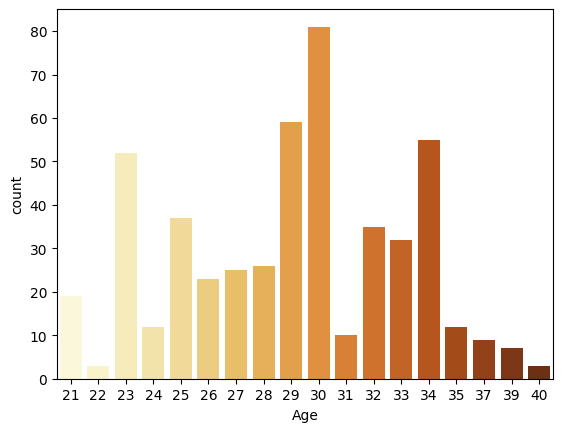

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.Age.value_counts(dropna=False)
sns.countplot(x="Age", data=df, palette="YlOrBr")
plt.show()

<ipython-input-99-0b868d275816>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Parity_n", data=df, palette="Paired")


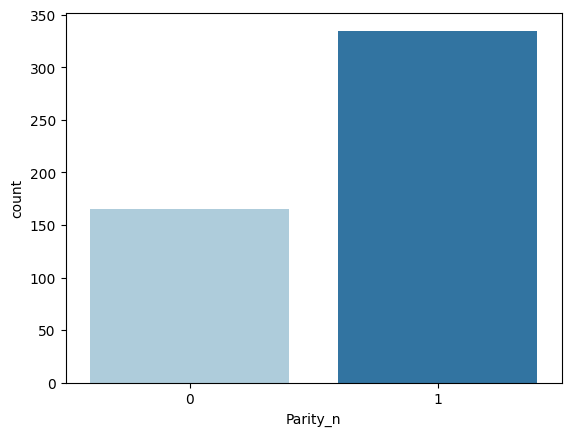

In [ ]:
df.Parity_n.value_counts(dropna=False)
sns.countplot(x="Parity_n", data=df, palette="Paired")
plt.show()

<ipython-input-100-efd286d8f0d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gravidity_n", data=df, palette="rocket")


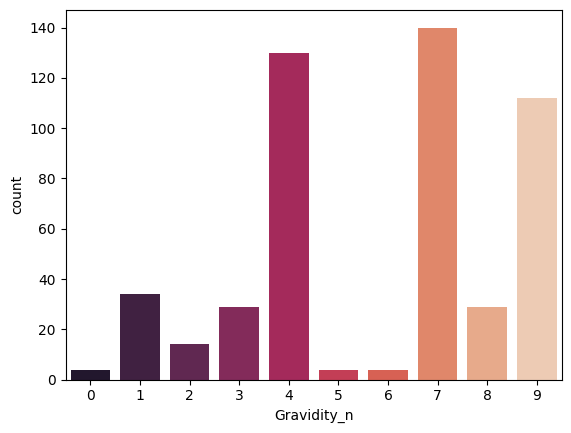

In [ ]:
df.Gravidity_n.value_counts(dropna=False)
sns.countplot(x="Gravidity_n", data=df, palette="rocket")
plt.show()

In [ ]:
df2=pd.DataFrame(df['Preeclampsia(1)/NA(0)'])
df2.rename(columns={'Preeclampsia(1)/NA(0)': 'Result'}, inplace=True)

<ipython-input-102-e7abb78e6c36>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Result", data=df2, palette="YlOrBr")


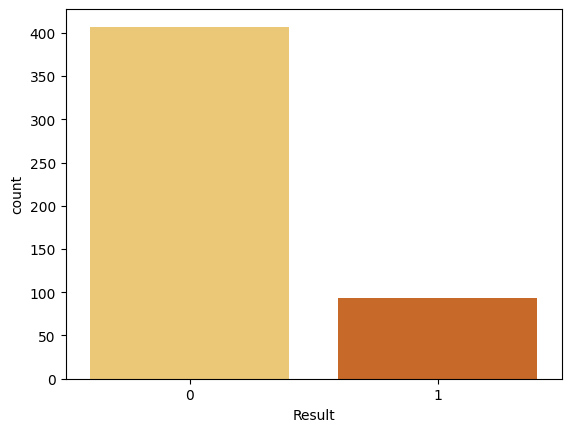

In [ ]:
df2.Result.value_counts(dropna=False)
sns.countplot(x="Result", data=df2, palette="YlOrBr")
plt.show()

### **Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Preeclampsia(1)/NA(0)'], axis=1),
    df['Preeclampsia(1)/NA(0)'],
    test_size=0.25,
    random_state=0)

In [ ]:
X_train.head()

,Age,Weight before pregnancy,Weight in late first trimester,BMI before pregnancy,BMI in late first trimester,DBP in early pregnancy,DBP in the late first trimester,SBP in early pregnancy,SBP in the late first trimester,Hemoglobin level measured in the first trimester,...,PAPP-A(mlU/ml),F B-hCG (ng/ml),Gravidity_n,Parity_n,Protein,Smoking,Alcohol,Hypertension,History of Preeclampsia,Diabetese
239,29,78.0,78.8,35.5,35.5,1.500000,1.714286,1.500000,1.714286,11.1,...,3.267,15.200,9,0,0,0,0,0,0,0
59,40,66.9,67.1,26.2,26.2,1.571429,1.428571,1.571429,1.428571,12.6,...,0.490,0.893,8,1,0,0,0,0,0,0
406,28,55.0,55.6,22.7,22.7,1.500000,1.666667,1.500000,1.666667,11.2,...,3.950,42.180,7,1,0,0,0,0,0,0
391,30,83.0,84.0,35.9,35.9,1.375000,1.571429,1.375000,1.571429,11.5,...,3.066,22.260,7,1,0,0,0,0,0,0
411,32,66.0,66.9,28.2,28.2,1.500000,1.625000,1.500000,1.625000,12.6,...,1.300,99.630,9,0,0,0,0,0,0,0


### **Model Evaluation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=50)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
print(model_rf.score(X_test, y_test))
pred=model_rf.predict(X_test)

0.92


In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix

auroc = roc_auc_score(y_test, pred)

confusion = confusion_matrix(y_test, pred)

# Extract true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)
TN, FP, FN, TP = confusion.ravel()

# Calculate Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate Positive Predictive Value (PPV)
ppv = TP / (TP + FP)

# Calculate Negative Predictive Value (NPV)
npv = TN / (TN + FN)

print(TN, FP, FN, TP)

print("AUROC:", auroc)
print("Sensitivity (True Positive Rate or Recall):", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)


101 0 10 14
AUROC: 0.7916666666666667
Sensitivity (True Positive Rate or Recall): 0.5833333333333334
Specificity: 1.0
Positive Predictive Value (PPV): 1.0
Negative Predictive Value (NPV): 0.9099099099099099


In [ ]:
listpred_bf= [[32,52,54,24,24.30,1.4444,1.77777,1.44444,1.777778,10.90,11.20,1.2,70.0,1.30,50.1,1.3,0.99,0.92,59.970,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0]]
testpred_bf= np.array(listpred_bf)
a=model_rf.predict(testpred_bf)
print(a)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
df.iloc[5]

Preeclampsia(1)/NA(0)                                          1.000000
Age                                                           32.000000
Weight before pregnancy                                       52.000000
Weight in late first trimester                                54.000000
BMI before pregnancy                                          24.000000
BMI in late first trimester                                   24.300000
DBP in early pregnancy                                         1.444444
DBP in the late first trimester                                1.777778
SBP in early pregnancy                                         1.444444
SBP  in the late first trimester                               1.777778
Hemoglobin level measured in the first trimester              10.900000
Hemoglobin level measured in the second or third trimester    11.200000
MAP                                                            1.200000
CRL                                                           70

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train, y_train)
model_svm.score(X_test, y_test)

0.832

In [ ]:
pred_svm=model_svm.predict(X_test)
print(pred_svm)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
90     0
254    0
283    0
445    0
461    0
      ..
430    0
49     0
134    0
365    0
413    1
Name: Preeclampsia(1)/NA(0), Length: 125, dtype: int64


In [ ]:
from sklearn import tree
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
print(model_dt.score(X_test, y_test))
pred_dt=model_svm.predict(X_test)

0.92


In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
print(model_lr.score(X_test, y_test))
pred=model_lr.predict(X_test)

0.896


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix

auroc = roc_auc_score(y_test, pred)

# Calculate the confusion matrix
threshold = 0.5  # Threshold for converting probabilities to binary predictions
predicted_labels = [1 if p >= threshold else 0 for p in pred]
confusion = confusion_matrix(y_test, pred)

# Extract true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)
TN, FP, FN, TP = confusion.ravel()

# Calculate Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate Positive Predictive Value (PPV)
ppv = TP / (TP + FP)

# Calculate Negative Predictive Value (NPV)
npv = TN / (TN + FN)

print("AUROC:", auroc)
print("Sensitivity (True Positive Rate or Recall):", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)


AUROC: 0.7609323432343233
Sensitivity (True Positive Rate or Recall): 0.5416666666666666
Specificity: 0.9801980198019802
Positive Predictive Value (PPV): 0.8666666666666667
Negative Predictive Value (NPV): 0.9


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model_gb.fit(X_train, y_train)
accuracy_gb = model_gb.score(X_test, y_test)
print(accuracy_gb)

0.904


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_classifier = KNeighborsClassifier()

# Fit the model to the training data
knn_classifier.fit(X_train, y_train)

# Evaluate the model on the test data
pred_knn = knn_classifier.predict(X_test)

# Print the accuracy score
accuracy_knn = accuracy_score(y_test, pred_knn)
print(f'KNN Accuracy: {accuracy_knn}')


KNN Accuracy: 0.92


In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train is your training data
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model on the training data
clusters = dbscan.fit_predict(X_train)

# Evaluate the clustering (optional)
unique_clusters = np.unique(clusters)
n_clusters = len(unique_clusters) - 1 if -1 in unique_clusters else len(unique_clusters)

print(f"Number of clusters: {n_clusters}")

# Plot the clusters (2D data)
if X_train.shape[1] == 2:
    plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters, cmap='rainbow', marker='o', edgecolors='black')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('DBSCAN Clustering')
    plt.show()


Number of clusters: 31


In [ ]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette_avg = silhouette_score(X_train, clusters)

print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5564371831759417


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Predict on test set
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Gaussian Naive Bayes: {accuracy:.4f}")


Accuracy of Gaussian Naive Bayes: 0.4160


## ***Feature Selection***

Feature Selection using **XGBoost**

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

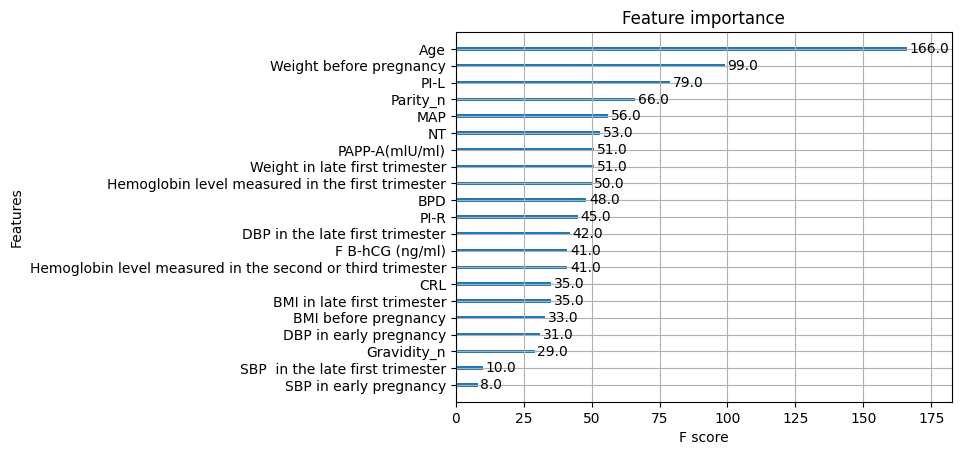

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# plot feature importance
plot_importance(model)
pyplot.show()

**Fisher Score- Chisquare Test For Feature Selection**

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

In [ ]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [ ]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

Age                                                           1.452826e-04
Weight before pregnancy                                       3.375381e-03
Weight in late first trimester                                1.610714e-03
BMI before pregnancy                                          2.788329e-02
BMI in late first trimester                                   9.323333e-03
DBP in early pregnancy                                        7.447160e-01
DBP in the late first trimester                               5.899800e-01
SBP in early pregnancy                                        7.576782e-01
SBP  in the late first trimester                              6.008409e-01
Hemoglobin level measured in the first trimester              2.734349e-04
Hemoglobin level measured in the second or third trimester    4.479197e-19
MAP                                                           6.073270e-01
CRL                                                           3.387298e-05
NT                       

In [ ]:
p_values.sort_values(ascending=False)

Parity_n                                                      9.181650e-01
PI-L                                                          8.804195e-01
NT                                                            8.324774e-01
SBP in early pregnancy                                        7.576782e-01
DBP in early pregnancy                                        7.447160e-01
PI-R                                                          6.390810e-01
MAP                                                           6.073270e-01
SBP  in the late first trimester                              6.008409e-01
DBP in the late first trimester                               5.899800e-01
Gravidity_n                                                   3.914791e-01
BPD                                                           3.679220e-01
PAPP-A(mlU/ml)                                                3.118953e-01
BMI before pregnancy                                          2.788329e-02
BMI in late first trimest

**SelectKBest** is a feature selection method in scikit-learn that selects the top k features based on a specified statistical test.

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

k = 10  # You can choose the desired number of features
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the names of the selected features
selected_feature_names = X_train.columns[selector.get_support()]

print("Selected Feature Names:", selected_feature_names)


Selected Feature Names: Index(['Weight before pregnancy', 'Weight in late first trimester',
       'BMI in late first trimester', 'DBP in early pregnancy',
       'DBP in the late first trimester', 'SBP in early pregnancy',
       'SBP  in the late first trimester', 'CRL', 'BPD', 'PI-R'],
      dtype='object')


**Feature Selection Using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf=model.feature_importances_
rf = pd.Series(rf)
rf.index = X_train.columns
rf.sort_values(ascending=False)

DBP in the late first trimester                               0.138507
Age                                                           0.116070
SBP  in the late first trimester                              0.104215
Weight in late first trimester                                0.073052
PI-R                                                          0.059209
BMI in late first trimester                                   0.043197
MAP                                                           0.042716
SBP in early pregnancy                                        0.042680
F B-hCG (ng/ml)                                               0.042490
Weight before pregnancy                                       0.040472
PAPP-A(mlU/ml)                                                0.039452
BPD                                                           0.035821
CRL                                                           0.034209
PI-L                                                          0.027703
Hemogl

<Axes: >

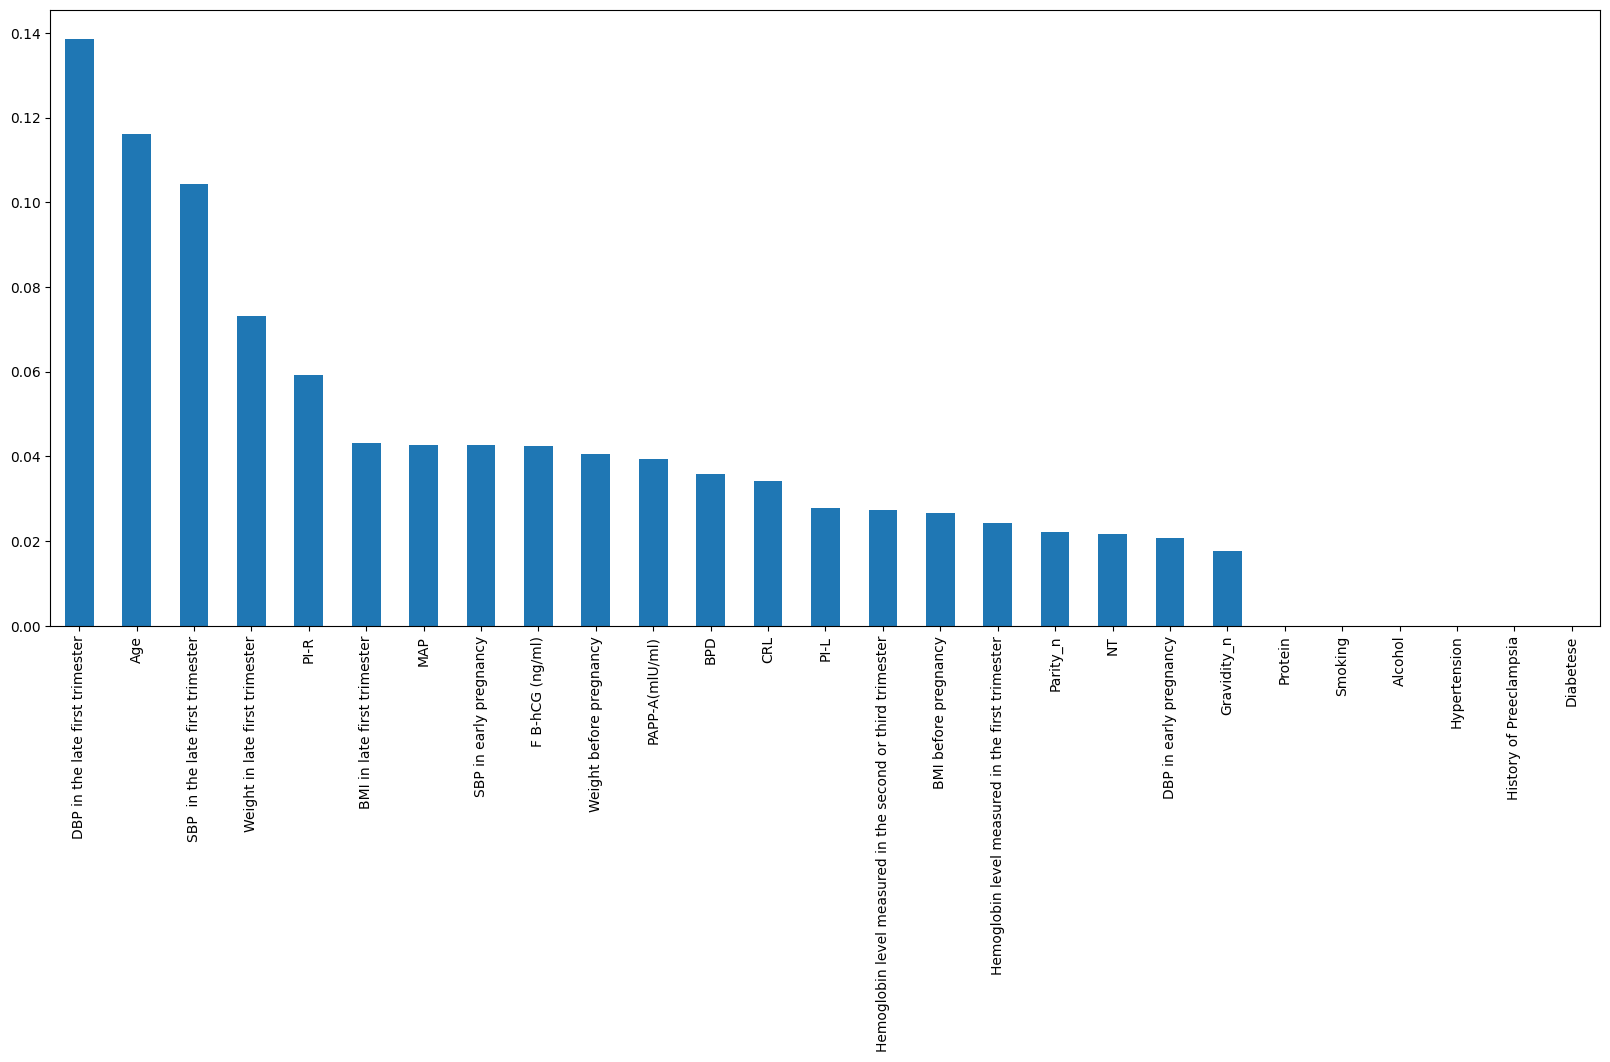

In [ ]:
rf.sort_values(ascending=False).plot.bar(figsize=(20, 8))

## **Ensemble Feature Selection**

**SelectKBes**t is a feature selection method in scikit-learn that selects the top k features based on a specified statistical test. In the case of SelectKBest(chi2, k=10), it uses the chi-squared (chi2) statistical test to select the top 10 features.

**Recursive Feature Elimination (RFE):** RFE works by recursively fitting the model, ranking features based on their importance, and eliminating the least important features. This process continues until the desired number of features is reached.

**Recursive Feature Elimination with Cross-Validation (RFECV):** RFECV extends RFE by performing feature elimination with cross-validation. It automatically finds the optimal number of features by evaluating the model's performance for different feature subsets. RFECV uses cross-validated performance scores to determine the optimal number of features.




**Feature concatenation (or feature polymerization)** is implemented by horizontally stacking the selected feature matrices obtained from different feature selection methods using np.hstack.
This approach combines the strengths of multiple feature selection methods by creating a single combined feature matrix containing the selected features from all methods.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your training data
# Get the column names
feature_names = X_train.columns

# Apply multiple feature selection methods
selector1 = SelectKBest(chi2, k=10)  # Select top 10 features based on chi-squared test
selector2 = RFE(RandomForestClassifier(), n_features_to_select=10)  # Recursive feature elimination
selector3 = RFECV(RandomForestClassifier(), step=1)  # Recursive feature elimination with cross-validation

X_selected1 = selector1.fit_transform(X_train, y_train)
X_selected2 = selector2.fit_transform(X_train, y_train)
X_selected3 = selector3.fit_transform(X_train, y_train)

# Compute the mean support array
mean_support = np.mean([selector1.get_support().astype(int),
                        selector2.get_support().astype(int),
                        selector3.get_support().astype(int)], axis=0)

# Select top features based on mean support
selected_feature_indices = np.argsort(-mean_support)[:10]
selected_feature_names_mean_support = feature_names[selected_feature_indices]

# Combine selected features using feature polymerization
X_concatenated = np.hstack((X_selected1, X_selected2, X_selected3))

# Select only the first 10 features from the concatenated matrix
X_concatenated_top10 = X_concatenated[:, :10]

# Print the top selected feature names
print("Top Selected Feature Names:")
for idx, feature_name in enumerate(selected_feature_names_mean_support, start=1):
    print(f"{idx}. {feature_name}")

print("Shape of Truncated Concatenated Feature Matrix:", X_concatenated_top10.shape)


Top Selected Feature Names:
1. Age
2. Hemoglobin level measured in the second or third trimester
3. F B-hCG (ng/ml)
4. Weight before pregnancy
5. Weight in late first trimester
6. BMI before pregnancy
7. BMI in late first trimester
8. DBP in the late first trimester
9. SBP  in the late first trimester
10. PAPP-A(mlU/ml)
Shape of Truncated Concatenated Feature Matrix: (375, 10)


New Dataframe which consists Top 10 features

In [ ]:
df3=df
df3

,Preeclampsia(1)/NA(0),Age,Weight before pregnancy,Weight in late first trimester,BMI before pregnancy,BMI in late first trimester,DBP in early pregnancy,DBP in the late first trimester,SBP in early pregnancy,SBP in the late first trimester,...,PAPP-A(mlU/ml),F B-hCG (ng/ml),Gravidity_n,Parity_n,Protein,Smoking,Alcohol,Hypertension,History of Preeclampsia,Diabetese
0,0,26,49.0,51.1,23.2,23.7,1.666667,1.571429,1.571429,1.500000,...,5.530,74.33,4,1,0,0,0,0,0,0
1,0,29,65.0,67.8,25.0,25.6,1.500000,1.375000,1.500000,1.571429,...,2.500,9.69,4,1,0,0,0,0,0,0
2,1,23,84.0,86.6,33.2,34.8,1.555556,1.400000,1.555556,1.400000,...,6.120,149.00,3,1,0,0,0,0,0,0
3,0,27,83.0,85.0,33.2,34.4,1.500000,1.625000,1.500000,1.625000,...,5.530,74.33,9,0,0,0,0,0,0,0
4,0,25,67.0,69.5,26.8,29.3,1.666667,1.666667,1.666667,1.666667,...,15.700,99.69,9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,23,50.0,53.0,23.1,23.6,1.833333,1.571429,1.833333,1.571429,...,1.200,68.80,7,1,0,0,0,0,0,0
496,1,33,51.0,53.0,23.0,23.6,1.833333,1.571429,1.833333,1.571429,...,3.460,52.25,7,1,0,0,0,0,0,0
497,1,34,52.0,54.5,20.0,21.2,1.375000,1.571429,1.375000,1.571429,...,1.200,68.80,4,1,0,0,0,0,0,0
498,0,32,52.0,54.0,24.0,24.3,1.444444,1.777778,1.444444,1.777778,...,0.929,59.97,8,1,0,0,0,0,0,0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 28 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Preeclampsia(1)/NA(0)                                       500 non-null    int64  
 1   Age                                                         500 non-null    int64  
 2   Weight before pregnancy                                     500 non-null    float64
 3   Weight in late first trimester                              500 non-null    float64
 4   BMI before pregnancy                                        500 non-null    float64
 5   BMI in late first trimester                                 500 non-null    float64
 6   DBP in early pregnancy                                      500 non-null    float64
 7   DBP in the late first trimester                             500 non-null    float64
 8   

In [ ]:
df3=df3.drop(labels=['Diabetese','Alcohol','Protein','Smoking','Hypertension','Parity_n','NT','History of Preeclampsia','PI-R','PI-L','Gravidity_n','BPD','CRL','BPD','MAP','Hemoglobin level measured in the first trimester','DBP in early pregnancy','Hemoglobin level measured in the first trimester','SBP in early pregnancy'],axis=1)

In [ ]:
df3.shape

(500, 11)

**Training and Testing Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(df3.drop(labels=['Preeclampsia(1)/NA(0)'], axis=1),
    df3['Preeclampsia(1)/NA(0)'],
    test_size=0.25,
    random_state=0)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Preeclampsia(1)/NA(0)                                       500 non-null    int64  
 1   Age                                                         500 non-null    int64  
 2   Weight before pregnancy                                     500 non-null    float64
 3   Weight in late first trimester                              500 non-null    float64
 4   BMI before pregnancy                                        500 non-null    float64
 5   BMI in late first trimester                                 500 non-null    float64
 6   DBP in the late first trimester                             500 non-null    float64
 7   SBP  in the late first trimester                            500 non-null    float64
 8   

 **Model Evaluation after Feature Selection**  

 Summary Given at the end of Notebook

RandomForest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf1 = RandomForestClassifier(n_estimators=20)
model_rf1.fit(X_train1, y_train1)

RandomForestClassifier(n_estimators=20)

In [ ]:
accuracy_rf=model_rf1.score(X_test1, y_test1)
pred_rf=model_rf1.predict(X_test1)
print(accuracy_rf)
print(y_test1)

0.92
90     0
254    0
283    0
445    0
461    0
      ..
430    0
49     0
134    0
365    0
413    1
Name: Preeclampsia(1)/NA(0), Length: 125, dtype: int64


In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix

auroc = roc_auc_score(y_test1, pred_rf)

confusion = confusion_matrix(y_test1, pred_rf)

# Extract true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)
TN, FP, FN, TP = confusion.ravel()

# Calculate Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate Positive Predictive Value (PPV)
ppv = TP / (TP + FP)

# Calculate Negative Predictive Value (NPV)
npv = TN / (TN + FN)

print(TN, FP, FN, TP)

print("AUROC:", auroc)
print("Sensitivity (True Positive Rate or Recall):", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)


101 0 10 14
AUROC: 0.7916666666666667
Sensitivity (True Positive Rate or Recall): 0.5833333333333334
Specificity: 1.0
Positive Predictive Value (PPV): 1.0
Negative Predictive Value (NPV): 0.9099099099099099


Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr1 = LogisticRegression()
model_lr1.fit(X_train1, y_train1)
accuracy_lr=model_lr1.score(X_test1, y_test1)
print(accuracy_lr)
pred_lr=model_lr1.predict(X_test1)

0.824


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix

auroc = roc_auc_score(y_test1, pred_lr)

confusion = confusion_matrix(y_test1, pred_lr)

# Extract true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)
TN, FP, FN, TP = confusion.ravel()

# Calculate Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate Positive Predictive Value (PPV)
ppv = TP / (TP + FP)

# Calculate Negative Predictive Value (NPV)
npv = TN / (TN + FN)

print(TN, FP, FN, TP)

print("AUROC:", auroc)
print("Sensitivity (True Positive Rate or Recall):", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)


98 3 19 5
AUROC: 0.5893151815181518
Sensitivity (True Positive Rate or Recall): 0.20833333333333334
Specificity: 0.9702970297029703
Positive Predictive Value (PPV): 0.625
Negative Predictive Value (NPV): 0.8376068376068376


SVM Model

In [ ]:
from sklearn.svm import SVC
model_svm1 = SVC()
model_svm1.fit(X_train1, y_train1)
accuracy_svm=model_svm1.score(X_test1, y_test1)

In [ ]:
pred_sv=model_svm1.predict(X_test1)
print(accuracy_svm)
print(y_test1)

0.848
90     0
254    0
283    0
445    0
461    0
      ..
430    0
49     0
134    0
365    0
413    1
Name: Preeclampsia(1)/NA(0), Length: 125, dtype: int64


In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix

auroc = roc_auc_score(y_test1, pred_sv)

confusion = confusion_matrix(y_test1, pred_sv)

TN, FP, FN, TP = confusion.ravel()

# Calculate Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate Positive Predictive Value (PPV)
ppv = TP / (TP + FP)

# Calculate Negative Predictive Value (NPV)
npv = TN / (TN + FN)

print(TN, FP, FN, TP)

print("AUROC:", auroc)
print("Sensitivity (True Positive Rate or Recall):", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)


101 0 19 5
AUROC: 0.6041666666666666
Sensitivity (True Positive Rate or Recall): 0.20833333333333334
Specificity: 1.0
Positive Predictive Value (PPV): 1.0
Negative Predictive Value (NPV): 0.8416666666666667


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_classifier = KNeighborsClassifier()

# Fit the model to the training data
knn_classifier.fit(X_train1, y_train1)

# Evaluate the model on the test data
pred_knn = knn_classifier.predict(X_test1)

# Print the accuracy score
accuracy_knn = accuracy_score(y_test1, pred_knn)
print(f'KNN Accuracy: {accuracy_knn}')


KNN Accuracy: 0.92


In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix


auroc = roc_auc_score(y_test1, pred_knn)

confusion = confusion_matrix(y_test1, pred_knn)

TN, FP, FN, TP = confusion.ravel()

# Calculate Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate Positive Predictive Value (PPV)
ppv = TP / (TP + FP)

# Calculate Negative Predictive Value (NPV)
npv = TN / (TN + FN)

print(TN, FP, FN, TP)

print("AUROC:", auroc)
print("Sensitivity (True Positive Rate or Recall):", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (PPV):", ppv)
print("Negative Predictive Value (NPV):", npv)


101 0 10 14
AUROC: 0.7916666666666667
Sensitivity (True Positive Rate or Recall): 0.5833333333333334
Specificity: 1.0
Positive Predictive Value (PPV): 1.0
Negative Predictive Value (NPV): 0.9099099099099099


XGBoost Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=5, random_state=0)
model_gb.fit(X_train1, y_train1)
accuracy_gb = model_gb.score(X_test1, y_test1)
print(accuracy_gb)

0.92


In [ ]:
from sklearn import tree
model_dt1 = tree.DecisionTreeClassifier()
model_dt1.fit(X_train1, y_train1)
print(model_dt1.score(X_test1, y_test1))


0.92


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train1, y_train1)

# Predict on test set
y_pred = gnb.predict(X_test1)

# Calculate accuracy
accuracy = accuracy_score(y_test1, y_pred)

print(f"Accuracy of Gaussian Naive Bayes: {accuracy:.4f}")


Accuracy of Gaussian Naive Bayes: 0.5040


Comapring silhouette score of DBSCAN before and after feature selection

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train is your training data
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model on the training data
clusters = dbscan.fit_predict(X_train1)

# Evaluate the clustering (optional)
unique_clusters = np.unique(clusters)
n_clusters = len(unique_clusters) - 1 if -1 in unique_clusters else len(unique_clusters)

print(f"Number of clusters: {n_clusters}")


Number of clusters: 31


In [ ]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette_avg = silhouette_score(X_train1, clusters)

print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5644993056573431


Implementing Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=20)

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(model_rf, X_train1, y_train1, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

print(f"Mean accuracy: {cross_val_scores.mean():.2f}")
print(f"Standard deviation: {cross_val_scores.std():.2f}")


Cross-validation scores: [0.88       0.96       0.88       0.90666667 0.96      ]
Mean accuracy: 0.92
Standard deviation: 0.04


<BarContainer object of 5 artists>

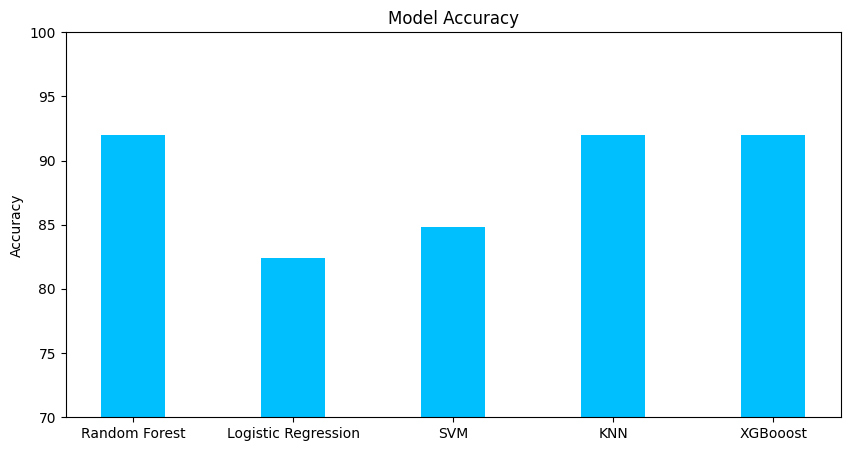

In [ ]:
compare1 = pd.DataFrame({'Model': ['Random Forest','Logistic Regression',
                                  'SVM', 'KNN','XGBooost'],
                        'Accuracy': [accuracy_rf*100, accuracy_lr*100, accuracy_svm*100,
                                     accuracy_knn*100,accuracy_gb*100]})
fig = plt.figure(figsize = (10,5))
plt.setp(plt.gca(), ylim=(70, 100))
# plt.xlabel("Algorithms Implemented")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")

plt.bar(compare1['Model'], compare1['Accuracy'], color ='deepskyblue',
        width = 0.4)


**Summary Of Algorithms Implemented**

Algorithms Which have performed **better** after Feature Selection:

SVM
Naive Bayes
XGBoost
DBSCAN


Algorithms Which have performed **same** after Feature Selection:

Random Forest
Decision Trees
KNeighbours

Algorithms Which have **NOT** performed same after Feature Selection:

Logistic Regression

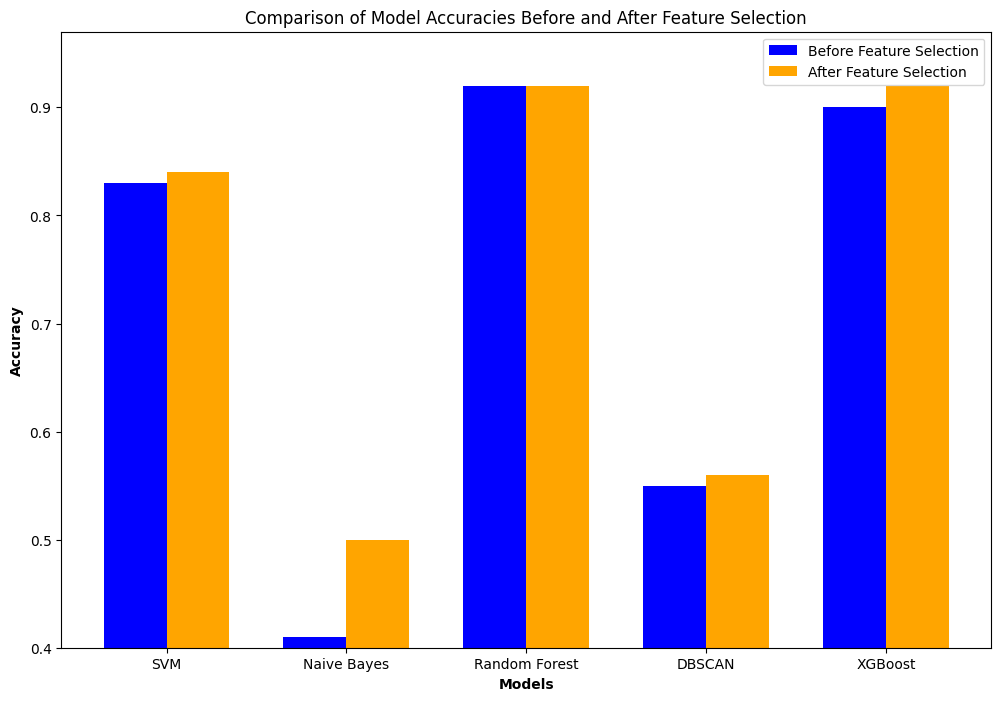

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['SVM', 'Naive Bayes', 'Random Forest', 'DBSCAN', 'XGBoost']
accuracies_before = [0.83, 0.41, 0.92,0.55,0.90]
accuracies_after = [0.84, 0.50, 0.92, 0.56, 0.92]

barWidth = 0.35

r1 = np.arange(len(accuracies_before))
r2 = [x + barWidth for x in r1]

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(r1, accuracies_before, color='blue', width=barWidth, label='Before Feature Selection')
plt.bar(r2, accuracies_after, color='orange', width=barWidth, label='After Feature Selection')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(accuracies_before))], models)
plt.title('Comparison of Model Accuracies Before and After Feature Selection')
plt.ylim(0.4, max(max(accuracies_before), max(accuracies_after)) + 0.05)

plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp

population_mean = 0

# Function to calculate p-value for each row
def calculate_p_values(dataframe, population_mean):
    p_values = []
    for index, row in dataframe.iterrows():
        # Exclude the first column which is not a continuous variable
        row_data = row[1:]
        # Perform a single sample t-test for the row
        t_stat, p_value = ttest_1samp(row_data, population_mean)
        p_values.append(p_value)
    return p_values

# Calculate p-values for each row
p_values = calculate_p_values(df, population_mean)

# Add p-values as a new column to the DataFrame
df['p_value'] = p_values
df.head()

,Preeclampsia(1)/NA(0),Age,Weight before pregnancy,Weight in late first trimester,BMI before pregnancy,BMI in late first trimester,DBP in early pregnancy,DBP in the late first trimester,SBP in early pregnancy,SBP in the late first trimester,...,F B-hCG (ng/ml),Gravidity_n,Parity_n,Protein,Smoking,Alcohol,Hypertension,History of Preeclampsia,Diabetese,p_value
0,0,26,49.0,51.1,23.2,23.7,1.666667,1.571429,1.571429,1.500000,...,74.33,4,1,0,0,0,0,0,0,0.001684
1,0,29,65.0,67.8,25.0,25.6,1.500000,1.375000,1.500000,1.571429,...,9.69,4,1,0,0,0,0,0,0,0.002870
2,1,23,84.0,86.6,33.2,34.8,1.555556,1.400000,1.555556,1.400000,...,149.00,3,1,0,0,0,0,0,0,0.005956
3,0,27,83.0,85.0,33.2,34.4,1.500000,1.625000,1.500000,1.625000,...,74.33,9,0,0,0,0,0,0,0,0.002001
4,0,25,67.0,69.5,26.8,29.3,1.666667,1.666667,1.666667,1.666667,...,99.69,9,0,0,0,0,0,0,0,0.002071


In [ ]:
average_p_value = df['p_value'].mean()

print(f'Average p-value: {average_p_value}')

Average p-value: 0.002652076352688951


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 29 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Preeclampsia(1)/NA(0)                                       500 non-null    int64  
 1   Age                                                         500 non-null    int64  
 2   Weight before pregnancy                                     500 non-null    float64
 3   Weight in late first trimester                              500 non-null    float64
 4   BMI before pregnancy                                        500 non-null    float64
 5   BMI in late first trimester                                 500 non-null    float64
 6   DBP in early pregnancy                                      500 non-null    float64
 7   DBP in the late first trimester                             500 non-null    float64
 8   

In [ ]:
average_age = df['Age'].mean()
average_weight_before_pregnancy = df['Weight before pregnancy'].mean()
average_weight_in_late_first_trimester = df['Weight in late first trimester'].mean()
average_bmi_before_pregnancy = df['BMI before pregnancy'].mean()
average_bmi_in_late_first_trimester = df['BMI in late first trimester'].mean()
average_dbp_early = df['DBP in early pregnancy'].mean()
average_dbp_late = df['DBP in the late first trimester'].mean()
average_sbp_early = df['SBP in early pregnancy'].mean()
average_sbp_late = df['SBP  in the late first trimester'].mean()
average_f_bhcg = df['F B-hCG (ng/ml)'].mean()
average_hemoglobin_first_trimester = df['Hemoglobin level measured in the first trimester'].mean()
average_hemoglobin_second_third_trimester = df['Hemoglobin level measured in the second or third trimester'].mean()
average_papp_a = df['PAPP-A(mlU/ml)'].mean()

print(f'Average p-value: {average_p_value}')
print(f'Average Age: {average_age}')
print(f'Average Weight before pregnancy: {average_weight_before_pregnancy}')
print(f'Average Weight in late first trimester: {average_weight_in_late_first_trimester}')
print(f'Average BMI before pregnancy: {average_bmi_before_pregnancy}')
print(f'Average BMI in late first trimester: {average_bmi_in_late_first_trimester}')
print(f'Average DBP in early pregnancy: {average_dbp_early}')
print(f'Average DBP in the late first trimester: {average_dbp_late}')
print(f'Average SBP in early pregnancy: {average_sbp_early}')
print(f'Average SBP in the late first trimester: {average_sbp_late}')
print(f'Average F B-hCG (ng/ml): {average_f_bhcg}')
print(f'Average Hemoglobin in first trimester: {average_hemoglobin_first_trimester}')
print(f'Average Hemoglobin in second or third trimester: {average_hemoglobin_second_third_trimester}')
print(f'Average PAPP-A(mlU/ml): {average_papp_a}')

Average p-value: 0.002652076352688951
Average Age: 29.036
Average Weight before pregnancy: 61.447399999999995
Average Weight in late first trimester: 62.8586
Average BMI before pregnancy: 25.610400000000002
Average BMI in late first trimester: 25.992800000000003
Average DBP in early pregnancy: 1.557198138986
Average DBP in the late first trimester: 1.5488534391159998
Average SBP in early pregnancy: 1.554960043718
Average SBP in the late first trimester: 1.552210581968
Average F B-hCG (ng/ml): 59.958102
Average Hemoglobin in first trimester: 12.1802
Average Hemoglobin in second or third trimester: 15.7626
Average PAPP-A(mlU/ml): 4.468406


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency, fisher_exact


# Define function to calculate p-values
def calculate_p_values(data):
    results = {}
    htn_group = data[data['Preeclampsia(1)/NA(0)'] == 1]
    no_htn_group = data[data['Preeclampsia(1)/NA(0)'] == 0]

    # Continuous variables
    continuous_vars = ['Age', 'Weight before pregnancy', 'Weight in late first trimester', 'BMI before pregnancy',
                       'BMI in late first trimester', 'DBP in early pregnancy', 'DBP in the late first trimester',
                       'SBP in early pregnancy', 'SBP  in the late first trimester', 'PAPP-A(mlU/ml)', 'F B-hCG (ng/ml)']

    for var in continuous_vars:
        stat, p_value = ttest_ind(htn_group[var].dropna(), no_htn_group[var].dropna())
        results[var] = p_value

    # Categorical variables
    categorical_vars = ['Diabetese']

    for var in categorical_vars:
        contingency_table = pd.crosstab(data['Preeclampsia(1)/NA(0)'], data[var])
        if contingency_table.shape == (2, 2):
            _, p_value = fisher_exact(contingency_table)
        else:
            _, p_value, _, _ = chi2_contingency(contingency_table)
        results[var] = p_value

    return results

# Calculate p-values
p_values = calculate_p_values(df)

# Print the results
for var, p_val in p_values.items():
    print(f'{var}: p-value = {p_val:.4f}')


Age: p-value = 0.0000
Weight before pregnancy: p-value = 0.1215
Weight in late first trimester: p-value = 0.0946
BMI before pregnancy: p-value = 0.0535
BMI in late first trimester: p-value = 0.0210
DBP in early pregnancy: p-value = 0.0001
DBP in the late first trimester: p-value = 0.0000
SBP in early pregnancy: p-value = 0.0001
SBP  in the late first trimester: p-value = 0.0000
PAPP-A(mlU/ml): p-value = 0.2098
F B-hCG (ng/ml): p-value = 0.0006
Diabetese: p-value = 1.0000
